In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
%matplotlib inline
import matplotlib.pyplot as plt

import sys 
import inspect
import seaborn as sns
import os
import copy

import perturbseq as perturb

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis')
sc.logging.print_versions()

scanpy==1.5.1 anndata==0.7.1 umap==0.4.4 numpy==1.17.2 scipy==1.4.1 pandas==0.24.2 scikit-learn==0.22 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.8.1


In [2]:
PROTEIN='TP53'
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14'
SUBSAMPLED=DATA+'/'+PROTEIN+'/subsampled/A549.'+PROTEIN

FIGS=DATA+'/2021-03-22_Figures/'
os.system('mkdir -p '+FIGS)
print(FIGS)

sc.settings.figdir=FIGS

/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/


In [3]:
ANNO=DATA+'/'+PROTEIN+'/anno'
anno=pd.read_csv(ANNO+'/'+PROTEIN+'.anno.complete3.csv',sep='\t',index_col=0)
anno=anno.loc[anno['Library_synthesis']=='in',:]

sorted_variants_df=pd.read_csv(DATA+'/'+PROTEIN+'/clustering/'+PROTEIN+'.corrL1.sorted_variants_2021-03-23.csv',header=None)
sorted_variants_df.index=sorted_variants_df[0]
sorted_variants=list(sorted_variants_df[0])
print(sorted_variants)

print(anno.columns)

['P359P', 'T170T', 'D21D', 'A83V', 'P295P', 'P153P', 'E2E', 'P47P', 'R158R', 'T118T', 'Q5R', 'G360V', 'V31I', 'P36P', 'P58R', 'P301P', 'L344L', 'P47S', 'P222P', 'T312S', 'WT', 'E339K', 'Y107H', 'S366A', 'V216V', 'R337C', 'R337L', 'unassigned', 'R280K', 'C277F', 'R213Q', 'P152L', 'S241C', 'R273H', 'R273L', 'R273C', 'K132R', 'R158H', 'M246V', 'M237I', 'V272L', 'C242F', 'E271K', 'Y205C', 'G154V', 'Y234C', 'Y220C', 'G266E', 'Y236C', 'R280T', 'R158L', 'R248W', 'C238F', 'Y163C', 'G266V', 'A159V', 'E285K', 'G105C', 'G245C', 'H179R', 'K132N', 'S241F', 'R248L', 'V272M', 'H193R', 'G245S', 'P250L', 'P278L', 'C141Y', 'A159P', 'G244C', 'E286K', 'S127F', 'C238Y', 'V216M', 'V173L', 'V157F', 'C176Y', 'C176F', 'H214R', 'H193Y', 'R110L', 'C135Y', 'R249S', 'R282W', 'L194R', 'G266R', 'R249M', 'G245V', 'C275Y', 'H179Y', 'P151S', 'R175H', 'C135F', 'I195T', 'P278S', 'V173M', 'G245D', 'C275F', 'H193L']
Index(['Variant.1', 'Variant.1.1', 'Position', 'From', 'To', 'mutation_type',
       'Count_pancan', 'Count_

In [4]:
#read in Giacomelli data

f='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2019-06-07/TP53/mutational_signatures/TP53_mutationalSignatures_Giacomelli.txt'
mutsig=pd.read_csv(f,sep='\t',skiprows=1)
mutsig.index=mutsig['Allele']
print(mutsig.head())
print(mutsig.columns)

#modify the names for the synonymous ones
import re
new_vars=[]
for i in range(mutsig.shape[0]):
    v=mutsig.index[i]
    new_var_here=v
    if 'B' in v:
        new_var_here=re.sub('B',v[0],v)
    new_vars.append(new_var_here)
mutsig.index=new_vars

       Allele AA_wt AA_variant  Position  A549_p53WT_Nutlin-3_Z-score  \
Allele                                                                  
R175H   R175H     R          H       175                     1.791388   
R248Q   R248Q     R          Q       248                     1.233480   
R273H   R273H     R          H       273                     1.145501   
R248W   R248W     R          W       248                     1.552718   
R273C   R273C     R          C       273                     1.261347   

        A549_p53NULL_Nutlin-3_Z-score  A549_p53NULL_Etoposide_Z-score  \
Allele                                                                  
R175H                        0.538396                       -0.744765   
R248Q                        0.217053                       -0.985385   
R273H                        1.077844                       -1.438387   
R248W                        0.613931                       -0.689231   
R273C                        0.314304             

In [5]:
mutsig1=mutsig
mutsig1['protein']='TP53'
sorted_variants1=sorted_variants

In [6]:
PROTEIN='KRAS'
DATA='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14'
SUBSAMPLED=DATA+'/'+PROTEIN+'/subsampled/A549.'+PROTEIN

counts=20000

FIGS=DATA+'/2021-03-22_Figures/'
os.system('mkdir -p '+FIGS)
print(FIGS)

sc.settings.figdir=FIGS

/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2021-03-22_Figures/


In [7]:
ANNO=DATA+'/'+PROTEIN+'/anno'
anno=pd.read_csv(ANNO+'/'+PROTEIN+'.anno.complete3.csv',sep='\t',index_col=0)
anno=anno.loc[anno['Library_synthesis']=='in',:]

sorted_variants_df=pd.read_csv(DATA+'/'+PROTEIN+'/clustering/'+PROTEIN+'.corrL1.sorted_variants_2021-03-23.csv',header=None)
sorted_variants_df.index=sorted_variants_df[0]
sorted_variants=list(sorted_variants_df[0])
print(sorted_variants)

print(anno.columns)

['M111L', 'T127T', 'V112I', 'R149K', 'S17S', 'T74T', 'I163S', 'G75A', 'S136N', 'K179R', 'T158A', 'T20T', 'V8V', 'A66A', 'M170L', 'D173D', 'T158T', 'A130V', 'D30D', 'K176Q', 'T144T', 'C118S', 'Y166H', 'WT', 'K88K', 'A155G', 'T50T', 'K169K', 'F141L', 'R135T', 'R164Q', 'P110S', 'K178K', 'L159S', 'L79I', 'Q25H', 'K147N', 'G77A', 'K147T', 'E63K', 'V14I', 'T50I', 'E31K', 'Q99E', 'R41K', 'T50P', 'T20R', 'Q22H', 'C185Y', 'T20M', 'T144P', 'L52F', 'T74A', 'D57N', 'unassigned', 'N26Y', 'D33E', 'L19F', 'Q61K', 'P34L', 'K5E', 'P34R', 'G60D', 'Q61P', 'G60S', 'G60V', 'R68S', 'I36M', 'T58I', 'Q22K', 'K117R', 'A59T', 'AG59GV', 'D119G', 'G12Y', 'G12F', 'V14L', 'A59E', 'G12S', 'G12A', 'A59G', 'A146V', 'G13C', 'G12C', 'A146P', 'A146T', 'G12V', 'AG11TD', 'G12D', 'G12I', 'G12R', 'Q61A', 'Q61H', 'Q61R', 'Q61L', 'G13E', 'K117N', 'G13V', 'G13R']
Index(['Variant.1', 'Variant.1.1', 'Position', 'From', 'To', 'mutation_type',
       'Count_pancan', 'Count_ExAC', 'control_status', 'control_color',
       'Library_s

In [8]:
f='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2019-06-07/KRAS/mutational_signatures/KRAS_mutationalSignatures_Andrew.txt'
mutsig=pd.read_csv(f,sep='\t')
mutsig.index=mutsig['Mutation']
print(mutsig.head())
print(mutsig.columns)

#modify the names for the synonymous ones
import re
new_vars=[]
for i in range(mutsig.shape[0]):
    v=mutsig.index[i]
    new_var_here=v
    if 'B' in v:
        new_var_here=re.sub('B',v[0],v)
    new_vars.append(new_var_here)
mutsig.index=new_vars
mutsig['protein']='KRAS'

          Position WT AA Final AA Mutation  COSMIC  Day0 Reads  Z-Low-D7  \
Mutation                                                                   
G12D            12     G        D     G12D  Single      1756.3      7.30   
G12V            12     G        V     G12V  Single      1803.0      6.88   
G12C            12     G        C     G12C  Single      2495.7      5.55   
G13D            13     G        D     G13D  Single      3388.3      5.68   
G12A            12     G        A     G12A  Single       922.0      3.28   

          Z-Low-D14  Z-High-D7  Z-High-D14  ...  Signature_21  Signature_22  \
Mutation                                    ...                               
G12D           6.41       2.47        4.21  ...        0.0062      0.001525   
G12V           5.89       2.57        4.08  ...        0.0007      0.002451   
G12C           4.74       1.86        2.41  ...        0.0020      0.004550   
G13D           4.90       1.81        3.21  ...        0.0392      0.003

In [9]:
sigs=['Signature_1', 'Signature_2', 'Signature_3',
       'Signature_4', 'Signature_5', 'Signature_6', 'Signature_7',
       'Signature_8', 'Signature_9', 'Signature_10', 'Signature_11',
       'Signature_12', 'Signature_13', 'Signature_14', 'Signature_15',
       'Signature_16', 'Signature_17', 'Signature_18', 'Signature_19',
       'Signature_20', 'Signature_21', 'Signature_22', 'Signature_23',
       'Signature_24', 'Signature_25', 'Signature_26', 'Signature_27',
       'Signature_28', 'Signature_29', 'Signature_30','protein']
ds=pd.concat([mutsig1.loc[:,sigs],#mutsig1.loc[sorted_variants1,sigs],
             mutsig.loc[:,sigs]])#mutsig.loc[sorted_variants,sigs]])
ds=pd.concat([mutsig1.loc[sorted_variants1,sigs],
             mutsig.loc[sorted_variants,sigs]])
ds.shape

/ahg/regevdata/users/oursu/software/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


(199, 31)

In [10]:
ds=ds.dropna()

In [11]:
df=pd.DataFrame(columns=['signature_score','signature','protein'])
for s in sigs:
    if s=='protein':
        continue
    df=pd.concat([df,pd.DataFrame({'signature_score':ds[s].astype(float),
                                   'signature':s,
                                  'protein':ds['protein']})],axis=0)
    
df.head()

,signature_score,signature,protein
A83V,0.103571,Signature_1,TP53
Q5R,0.007013,Signature_1,TP53
G360V,0.007342,Signature_1,TP53
V31I,0.171647,Signature_1,TP53
P58R,0.001285,Signature_1,TP53


[(('Signature_1', 'TP53'), ('Signature_1', 'KRAS')), (('Signature_2', 'TP53'), ('Signature_2', 'KRAS')), (('Signature_3', 'TP53'), ('Signature_3', 'KRAS')), (('Signature_4', 'TP53'), ('Signature_4', 'KRAS')), (('Signature_5', 'TP53'), ('Signature_5', 'KRAS')), (('Signature_6', 'TP53'), ('Signature_6', 'KRAS')), (('Signature_7', 'TP53'), ('Signature_7', 'KRAS')), (('Signature_8', 'TP53'), ('Signature_8', 'KRAS')), (('Signature_9', 'TP53'), ('Signature_9', 'KRAS')), (('Signature_10', 'TP53'), ('Signature_10', 'KRAS')), (('Signature_11', 'TP53'), ('Signature_11', 'KRAS')), (('Signature_12', 'TP53'), ('Signature_12', 'KRAS')), (('Signature_13', 'TP53'), ('Signature_13', 'KRAS')), (('Signature_14', 'TP53'), ('Signature_14', 'KRAS')), (('Signature_15', 'TP53'), ('Signature_15', 'KRAS')), (('Signature_16', 'TP53'), ('Signature_16', 'KRAS')), (('Signature_17', 'TP53'), ('Signature_17', 'KRAS')), (('Signature_18', 'TP53'), ('Signature_18', 'KRAS')), (('Signature_19', 'TP53'), ('Signature_19', '

(<matplotlib.axes._subplots.AxesSubplot at 0x2ba6697535c0>,
  <statannot.StatResult.StatResult at 0x2ba66f24f198>])

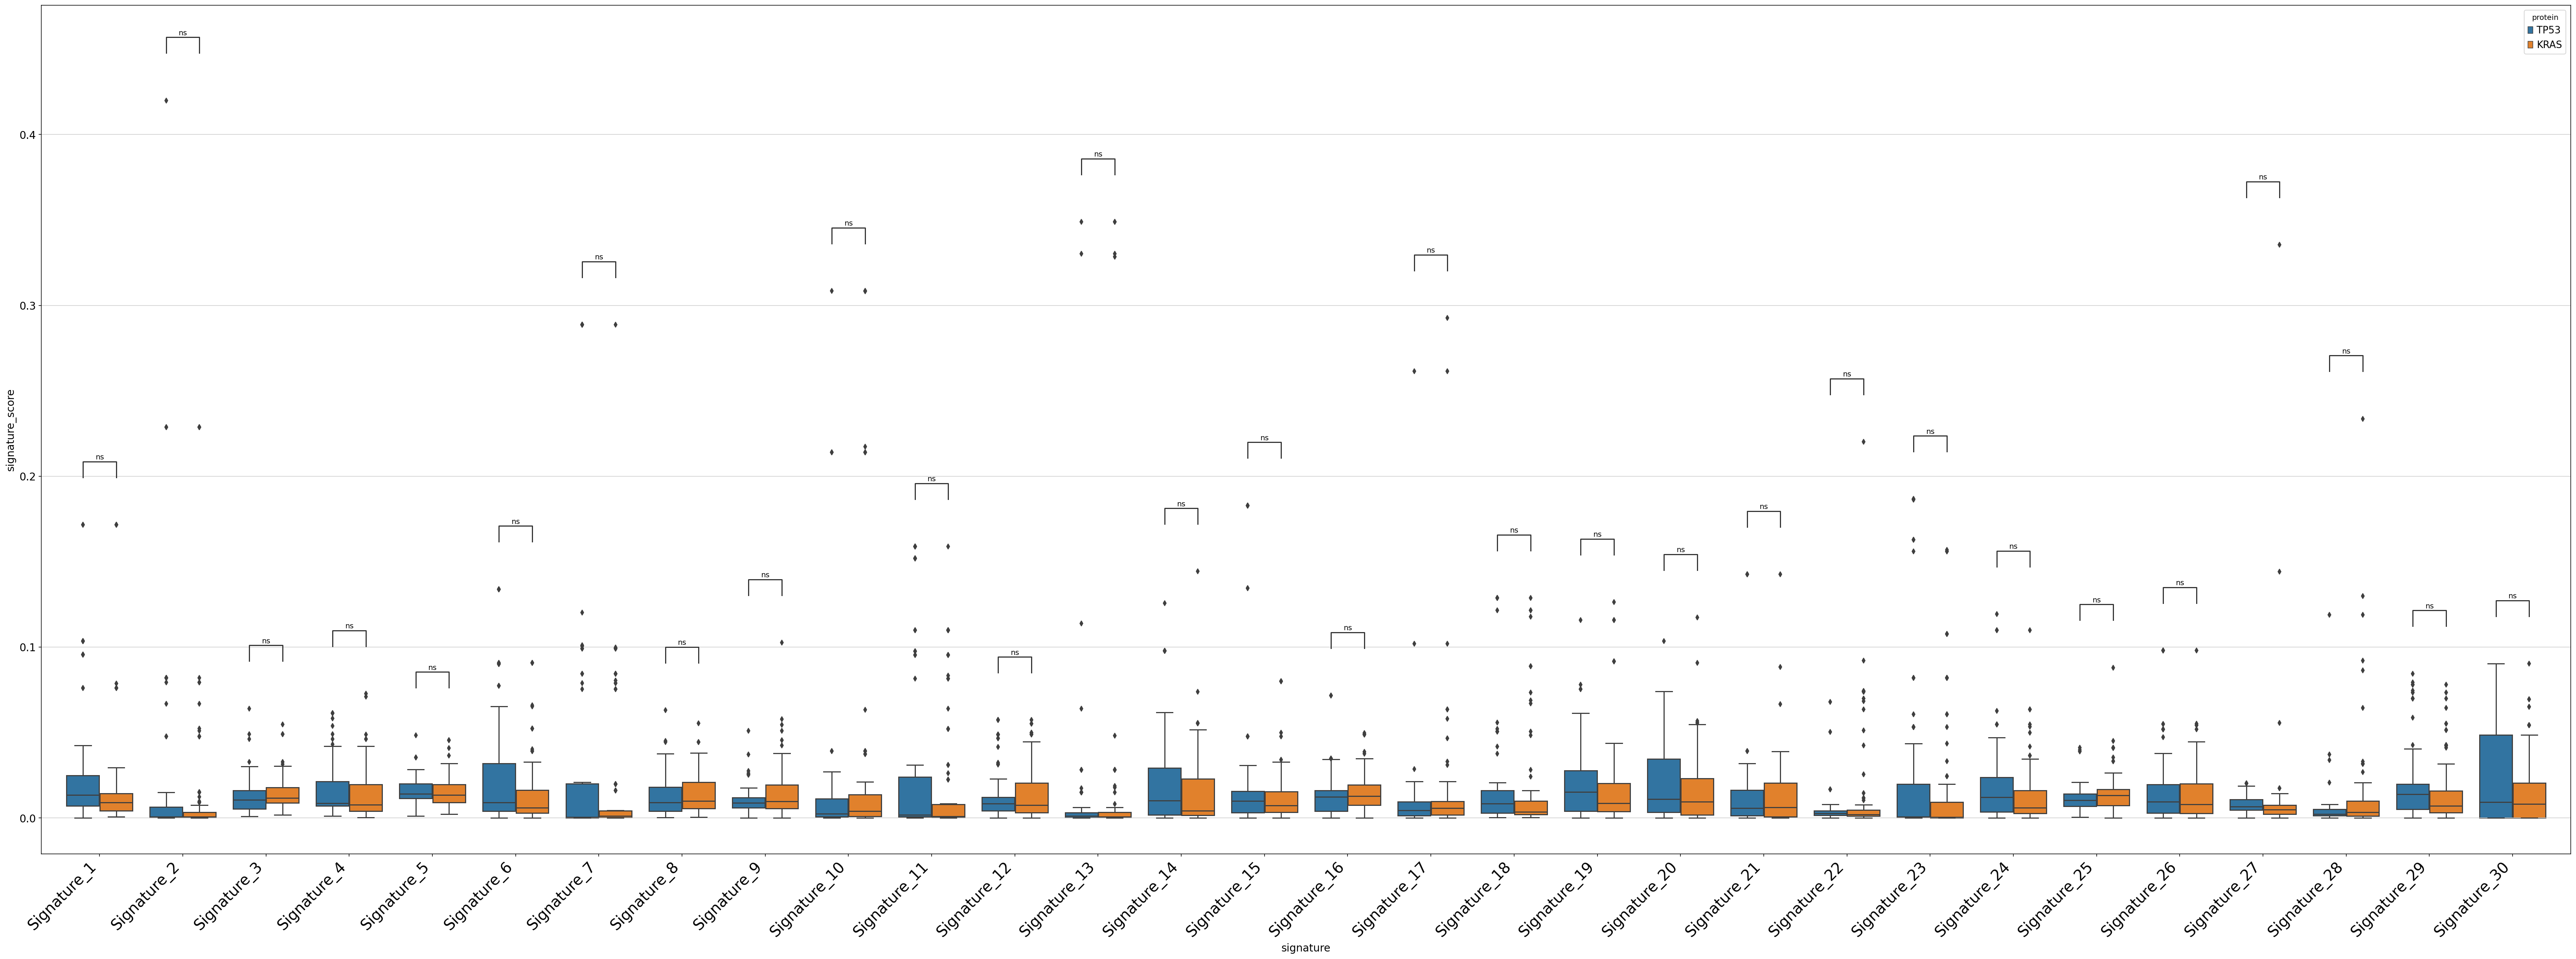

In [12]:
from statannot import add_stat_annotation

fig,plots=plt.subplots(1)
fig.set_size_inches(60,20)

sns.boxplot(data=df,x='signature',y='signature_score',hue='protein',
            #aspect=3,
            ax=plots,
           )
plots.set_xticklabels(plots.get_xticklabels(),rotation=45,ha='right',fontsize=20)

box_pairs=[]
for s in sigs:
    if s=='protein':
        continue
    
    box_pairs.append(((s,'TP53'),(s,'KRAS')))
print(box_pairs)
    
add_stat_annotation(plots, data=df,x='signature',y='signature_score',hue='protein', 
                    box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside')


#plt.ylim(0,0.1)

In [13]:
m=sc.AnnData(ds.iloc[:,:30])
m.obs_names_make_unique()
m.obs['protein']=ds['protein']

In [14]:
m

AnnData object with n_obs × n_vars = 173 × 30 
    obs: 'protein'

In [15]:
sc.pp.neighbors(m)
sc.tl.umap(m)

computing neighbors
    using data matrix X directly
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


... storing 'protein' as categorical


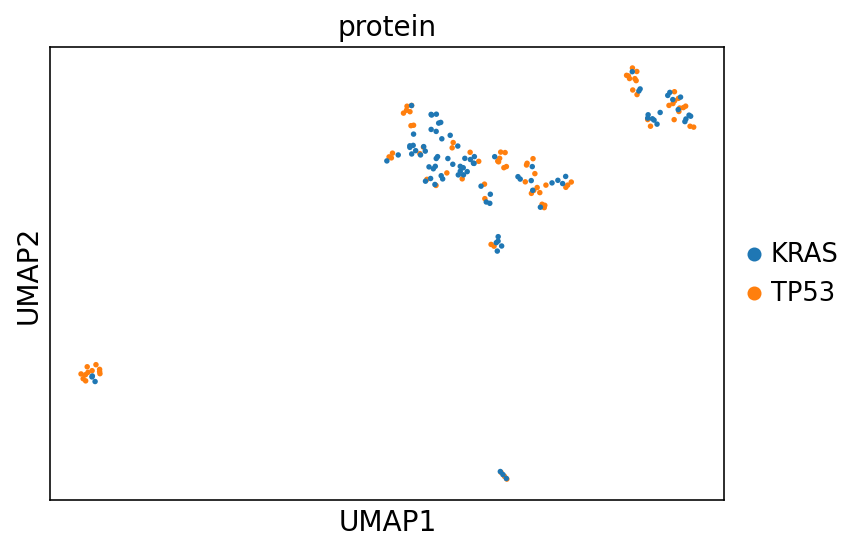

In [16]:
sc.pl.umap(m,color='protein',s=30)

In [ ]:
protcolor=perturb.tl.cat2color(m.obs['protein'])
protcolor

In [ ]:
sns.clustermap(ds.iloc[:,:30],
              row_colors=protcolor,cmap='rainbow')

In [ ]:
sns.clustermap(ds.iloc[:98,:30],
              row_colors=protcolor,cmap='rainbow',xticklabels=True)

In [ ]:
sns.clustermap(ds.iloc[98:,:30],
              row_colors=protcolor,cmap='rainbow',xticklabels=True)